<a href="https://colab.research.google.com/github/lutfiahintan/TubesCloudComputing/blob/main/TubesCCFix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pathlib
import PIL
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://cloudcomputingttx.blob.core.windows.net/blob/wajah.tar.gz"
data_dir = tf.keras.utils.get_file('wajah', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

74039296/74030317 [==============================] - 22s 0us/step


/root/.keras/datasets/wajah/wajahnormal/real_00176.jpg


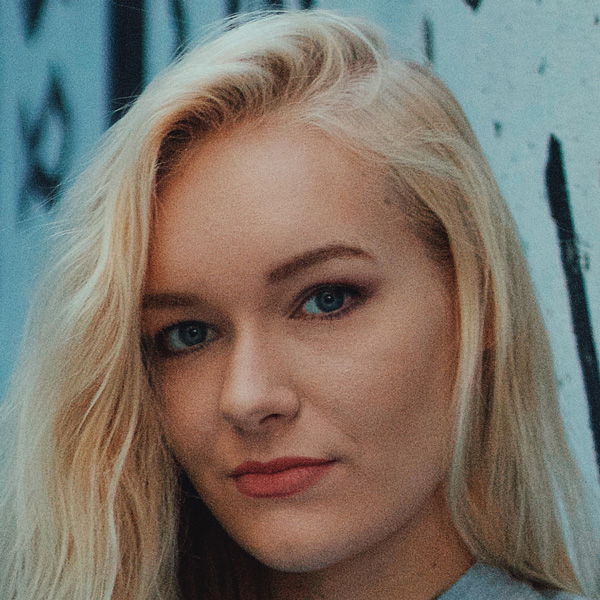

In [3]:
wajahnormal = list(data_dir.glob('wajahnormal/*'))
print(wajahnormal[0])
PIL.Image.open(str(wajahnormal[0]))

In [4]:
img_height,img_width=200,200
batch_size=32
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=125,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 762 files belonging to 2 classes.
Using 610 files for training.


In [5]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=125,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 762 files belonging to 2 classes.
Using 152 files for validation.


In [6]:
class_names = train_dataset.class_names
print(class_names)

['wajahberkomedo', 'wajahnormal']


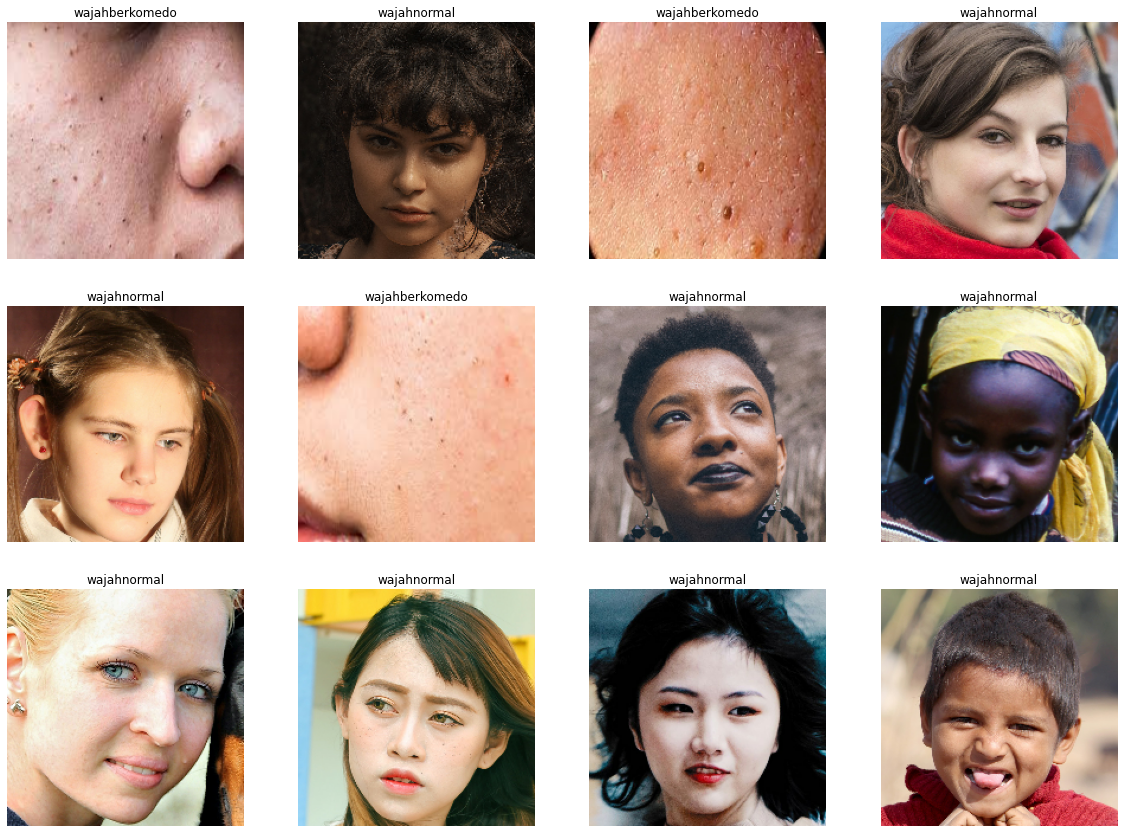

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, labels in train_dataset.take(1):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(2,activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        1

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
epochs=200
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 28s 1s/step - loss: 0.3664 - accuracy: 0.8377 - val_loss: 0.1659 - val_accuracy: 0.9605
Epoch 2/200
20/20 [==============================] - 27s 1s/step - loss: 0.1123 - accuracy: 0.9721 - val_loss: 1.3960 - val_accuracy: 0.8882
Epoch 3/200
20/20 [==============================] - 26s 1s/step - loss: 0.2247 - accuracy: 0.9459 - val_loss: 0.1079 - val_accuracy: 0.9605
Epoch 4/200
20/20 [==============================] - 26s 1s/step - loss: 0.0845 - accuracy: 0.9721 - val_loss: 0.0609 - val_accuracy: 0.9737
Epoch 5/200
20/20 [==============================] - 27s 1s/step - loss: 0.0385 - accuracy: 0.9869 - val_loss: 0.0523 - val_accuracy: 0.9671
Epoch 6/200
20/20 [==============================] - 27s 1s/step - loss: 0.0404 - accuracy: 0.9836 - val_loss: 0.1123 - val_accuracy: 0.9737
Epoch 7/200
20/20 [==============================] - 27s 1s/step - loss: 0.0215 - accuracy: 0.9918 - val_loss: 0.0696 - val_accuracy: 0.9868
Epoch 8/200
20/20 [======

In [12]:
model.save('model.h5')

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

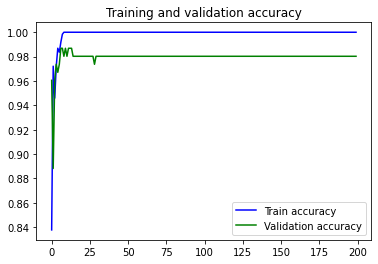

<Figure size 432x288 with 0 Axes>

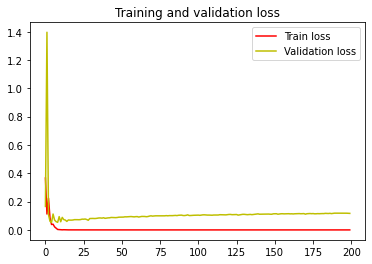

<Figure size 432x288 with 0 Axes>

In [14]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Train accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

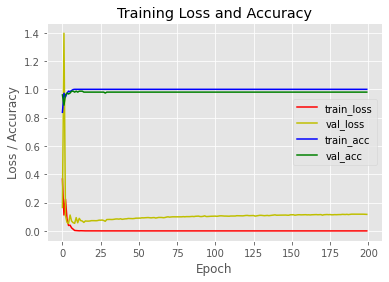

In [15]:
plt.style.use("ggplot")
plt.figure()
plt.plot(epochs, loss, 'r', label="train_loss")
plt.plot(epochs, val_loss, 'y',  label="val_loss")
plt.plot(epochs, acc, 'b',  label="train_acc")
plt.plot(epochs, val_acc, 'g', label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [16]:
!pip install gradio

     |████████████████████████████████| 865 kB 5.1 MB/s 
     |████████████████████████████████| 210 kB 38.1 MB/s 
     |████████████████████████████████| 2.0 MB 35.3 MB/s 
     |████████████████████████████████| 856 kB 45.6 MB/s 
     |████████████████████████████████| 3.6 MB 43.4 MB/s 
     |████████████████████████████████| 61 kB 394 kB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=b1f7625903a96c13b8de0a298c2c8df72754338cff03eb9313832d300bba02e0
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3373 sha256=20fc5209182b99652cc31f927b90c95b8dec6e1ae03f81694e561f97e00c554e
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [17]:
def predict_image(img):
  img_files=img.reshape(-1,200,200,3)
  prediction=model.predict(img_files)[0]
  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [ ]:
import gradio as gr
image = gr.inputs.Image(shape=(200,200))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://57363.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
